In [1]:
import pandas as pd

file_path = r'c:\Users\91735\OneDrive\Desktop\analyst content\data\projects\Antartica_Global_Assignment\Performance_Analytics&Projections_for_Business_Development\Data\Data Assignment.xlsx'

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(file_path, sheet_name=None)

# Extracting each sheet into separate DataFrames
df_Raj = dfs['Raj']
df_Arya = dfs['Arya']
df_Ali = dfs['Ali']

#Null Values(Holidays)
columns_to_check = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)']

# Creating a new dictionary to store the cleaned DataFrames
cleaned_dfs = {}

# Iterate over each sheet in the original dictionary and drop rows with missing values in the specified columns
for sheet_name, df in dfs.items():
    cleaned_dfs[sheet_name] = df.dropna(subset=columns_to_check)

df_Raj_cleaned = cleaned_dfs['Raj']
df_Arya_cleaned = cleaned_dfs['Arya']
df_Ali_cleaned = cleaned_dfs['Ali']

# Handling missing values in Other cols
df_Raj_cleaned.loc[:, 'Daily Team Review'] = df_Raj_cleaned['Daily Team Review'].ffill()
df_Raj_cleaned.loc[:, 'No. of Incomplete Leads'] = df_Raj_cleaned['No. of Incomplete Leads'].ffill()
cleaned_dfs['Raj']=df_Raj_cleaned

## Incomplete Leads Reduction Over Time:

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
def incomplete_leads_trend(associate_df):
    # Converting Date to numerical values (e.g., days since the first date)
    associate_df['Date'] = pd.to_datetime(associate_df['Date'])  # Convert Date to datetime
    associate_df['Days'] = (associate_df['Date'] - associate_df['Date'].min()).dt.days  # Calculate days since the first date
    
    # Reshape the data for linear regression (Days is the independent variable)
    X = associate_df['Days'].values.reshape(-1, 1)
    y = associate_df['No. of Incomplete Leads'].values
    
    # Fitting the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # To Predict values and get the slope of the line
    trend = model.predict(X)
    slope = model.coef_[0]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(associate_df['Date'], y, color='green', marker='o', s=100, label='Actual Incomplete Leads')
    plt.plot(associate_df['Date'], trend, color='purple', linestyle='--', linewidth=2, label='Trend Line')
    
    plt.xticks(rotation=45)
  
    plt.title('Trend of Incomplete Leads Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('No. of Incomplete Leads', fontsize=14)
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Add a legend
    plt.legend(loc='upper right', fontsize=12)
    
    # Ensure the x-axis has integer ticks only (useful for small datasets)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    return slope

Trend Analysis for Raj:


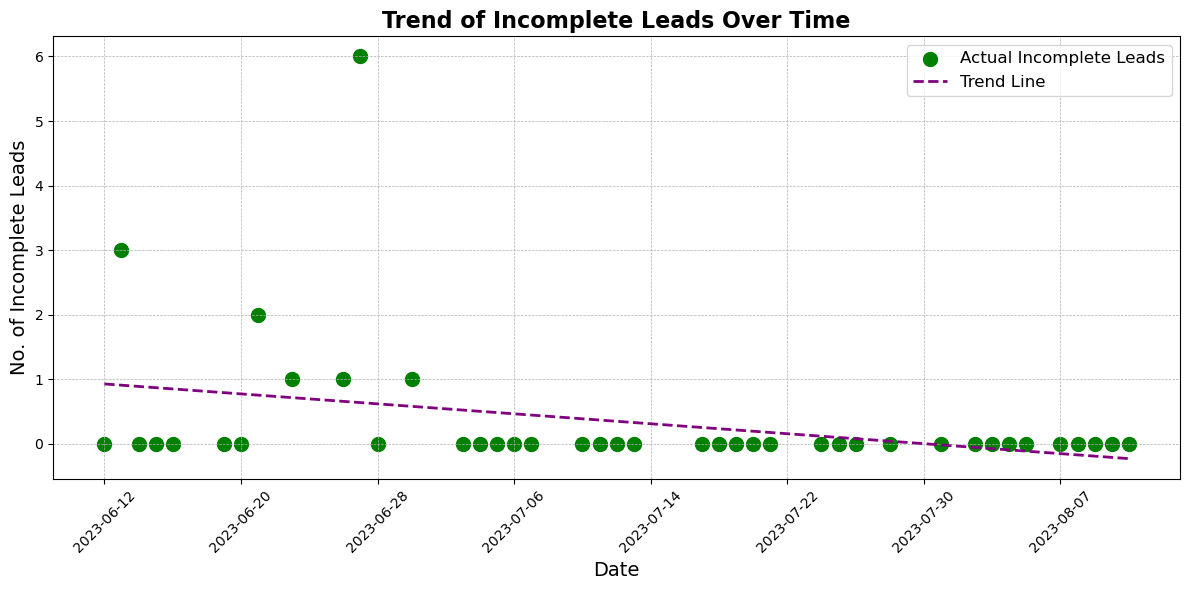

Raj is improving in reducing incomplete leads over time.


Trend Analysis for Arya:


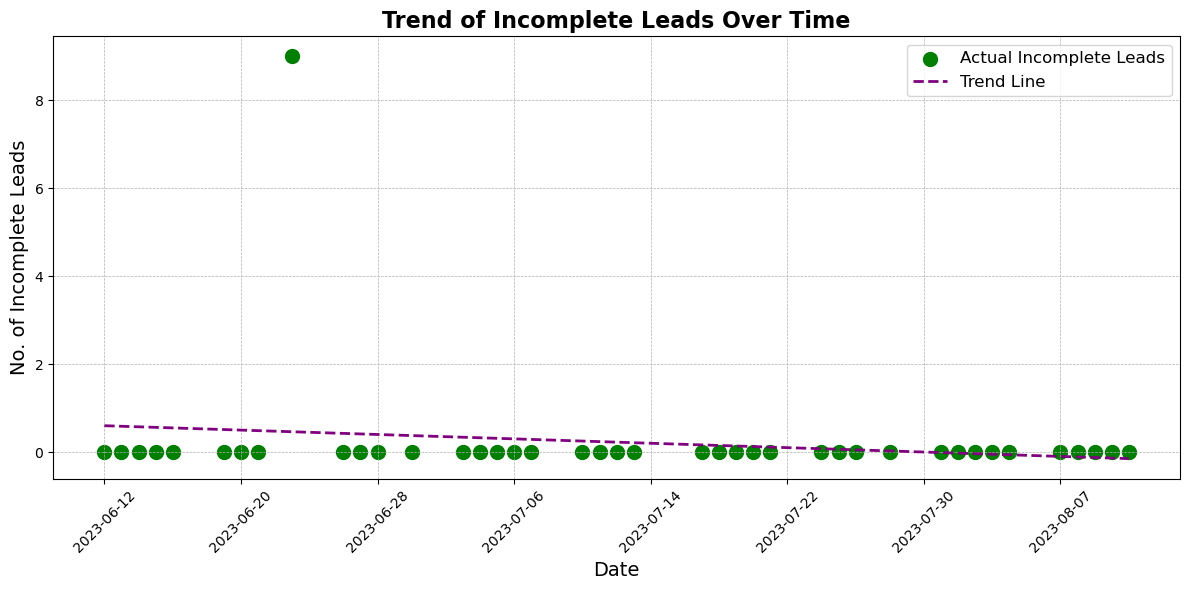

Arya is improving in reducing incomplete leads over time.


Trend Analysis for Ali:


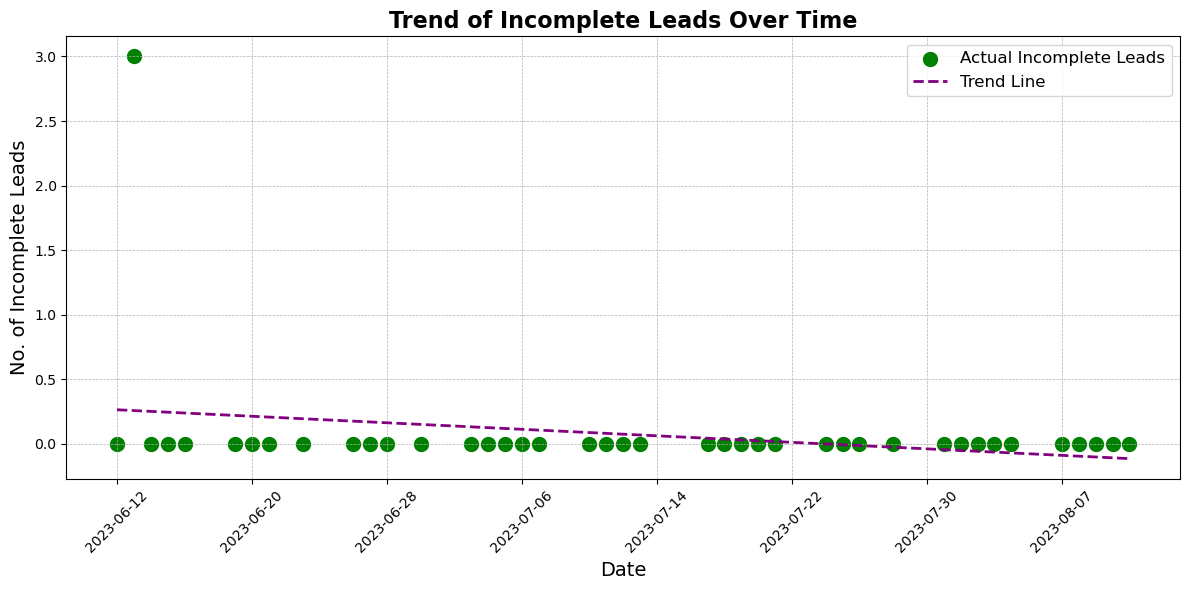

Ali is improving in reducing incomplete leads over time.




In [4]:
for associate, df in cleaned_dfs.items():
    print(f"Trend Analysis for {associate}:")
    slope = incomplete_leads_trend(df.copy())
    
    if slope < 0:
        print(f"{associate} is improving in reducing incomplete leads over time.")
    elif slope > 0:
        print(f"{associate} is deteriorating, with an increase in incomplete leads over time.")
    else:
        print(f"{associate}'s incomplete leads are stable over time.")
    
    print("\n")


## Insight 

- #### Raj is improving in reducing incomplete leads over time.
- #### Arya is improving in reducing incomplete leads over time. but as the no of days missed are very low so it would be better not to say something about improving over time.
- #### Ali has Same trend as Arya.

## Predictive Analysis:
**Question:** Using a simple linear regression model, predict the number of leads each associate is expected to generate based on their time spent on lead generation. How accurate is the model when compared to actual data?

In [5]:
from sklearn.metrics import mean_absolute_error, r2_score

In [6]:
def prepare_data(df):
    # Selecting relevant columns: Time spent on LG and Leads
    X = df['Time spent on LG (mins)'].values.reshape(-1, 1)  # Independent variable
    y = df['Leads'].values  # Dependent variable
    return X, y

In [7]:
def train_and_predict(X, y):
    # Initialize the model
    model = LinearRegression()
    
    # Fit the model on the data
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    return model, y_pred

In [8]:
def evaluate_model(y_true, y_pred):
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    
    # Calculate R-squared value
    r2 = r2_score(y_true, y_pred)
    
    return mae, r2

In [9]:
def plot_results(df, y_pred, associate_name):
    plt.figure(figsize=(10, 6))
    
    # Plot actual leads
    plt.scatter(df['Time spent on LG (mins)'], df['Leads'], color='blue', label='Actual Leads')
    
    # Plot predicted leads
    plt.plot(df['Time spent on LG (mins)'], y_pred, color='red', linestyle='--', label='Predicted Leads')
    
    # Customize the plot
    plt.title(f'Leads Prediction for {associate_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Time Spent on Lead Generation (mins)', fontsize=14)
    plt.ylabel('Number of Leads', fontsize=14)
    plt.legend()
    plt.grid(False)
    plt.show()


Predictive Analysis for Raj:
  Mean Absolute Error (MAE): 1.51
  R-squared (R2): 0.41


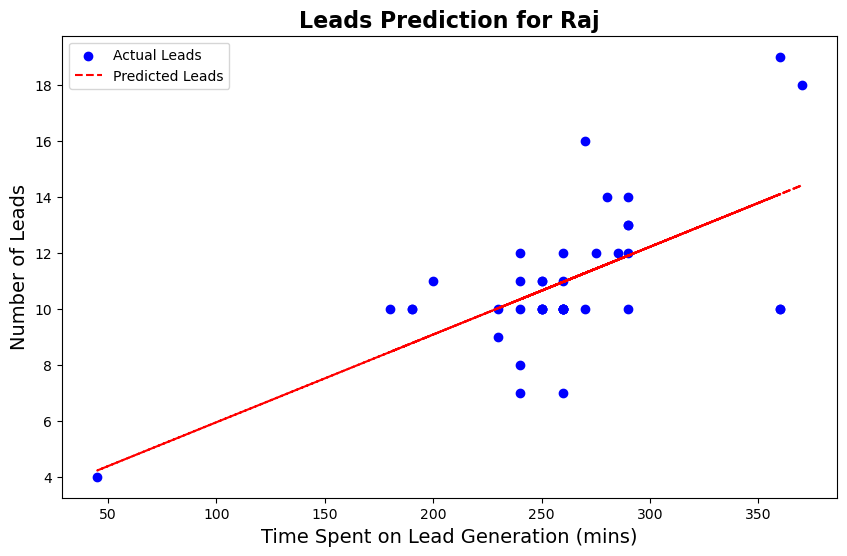



Predictive Analysis for Arya:
  Mean Absolute Error (MAE): 1.49
  R-squared (R2): 0.10


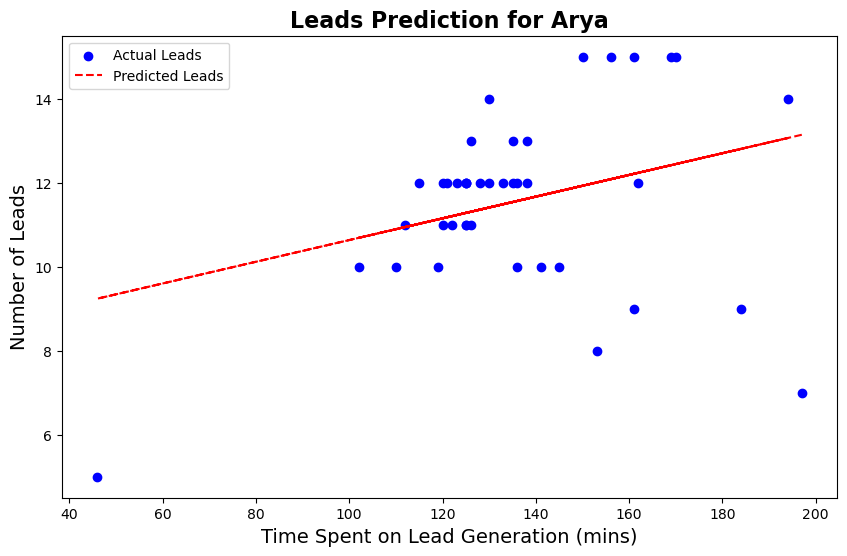



Predictive Analysis for Ali:
  Mean Absolute Error (MAE): 2.05
  R-squared (R2): 0.27


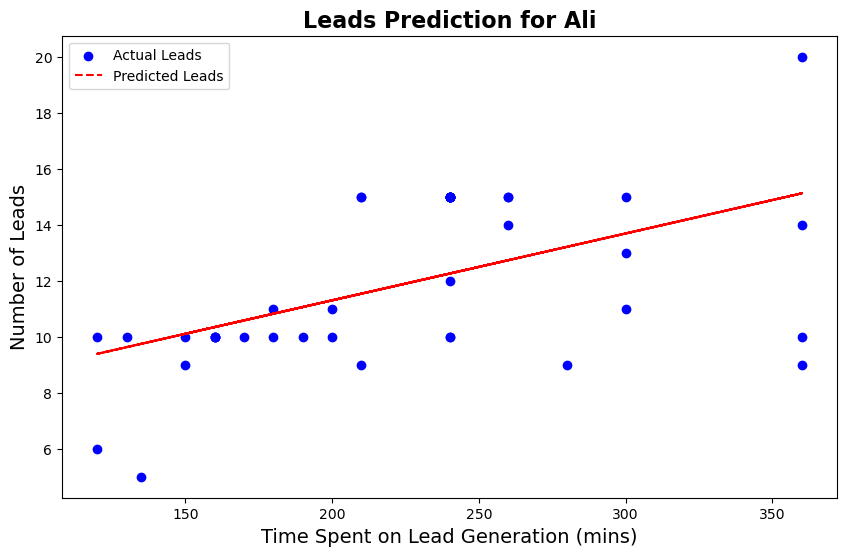

In [10]:
def predictive_analysis(associate_data):
    for associate_name, df in associate_data.items():
        # Prepare the data
        X, y = prepare_data(df)
        
        # Train the model and make predictions
        model, y_pred = train_and_predict(X, y)
        
        # Evaluate the model
        mae, r2 = evaluate_model(y, y_pred)
        
        # Print evaluation metrics
        print(f"Predictive Analysis for {associate_name}:")
        print(f"  Mean Absolute Error (MAE): {mae:.2f}")
        print(f"  R-squared (R2): {r2:.2f}")
        
        # Visualize the results
        plot_results(df, y_pred, associate_name)
        print("\n")

predictive_analysis(cleaned_dfs)


## Insight

**Model Performance:** The linear regression model's predictive power varies significantly between associates. Raj has the highest R-squared value, indicating that the time he spends on lead generation has a more direct correlation with the number of leads he generates. In contrast, Arya has the lowest R-squared value, suggesting that time spent is not a strong predictor for her lead generation.

**Factors Affecting Performance:**

- For Raj, the model captures a moderate relationship between time spent and leads generated, though there is still room for improvement, indicating other influencing factors.
- For Arya, the low R-squared suggests that her lead generation might depend on factors other than just time spent, such as the quality of interactions, the time of day, or external market conditions.
- For Ali, while time spent has some predictive power, the higher error rate and moderate R-squared indicate that there are other factors at play that the model does not capture.

**Actionable Insights:**

- For Raj: The time spent on lead generation is a relatively good indicator of his performance, but focusing on optimizing other variables could further enhance his output.
- For Arya: Since time spent is not a strong predictor, it would be beneficial to investigate other factors that contribute to her success and tailor strategies accordingly.
- For Ali: Like Raj, Ali's performance is influenced by time spent, but with more significant errors, suggesting that refining the model with additional features or improving lead-generation strategies could help.